In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

# Load data
data = pd.read_csv('Medical_Dataset_500.csv').drop(['PatientID'],axis=1) 


In [43]:
data.head(10)

,Age,Gender,Ethnicity,BMI,PhysicalActivityLevel,DietQuality,GeneticMarker1,GeneticMarker2,BloodSugarLevel,T2DMProgression
0,62,Female,White,38.6,Moderate,Low,1.2,0.9,194,No
1,65,Male,Hispanic,33.9,Moderate,Medium,1.1,1.1,165,No
2,71,Male,Black,18.7,Moderate,High,1.1,1.1,100,No
3,18,Female,Asian,27.4,Moderate,Medium,1.1,0.8,188,No
4,21,Male,White,20.1,Moderate,Low,1.1,0.8,147,Yes
5,77,Male,Asian,39.5,Low,Low,0.9,1.0,104,Yes
6,21,Female,Hispanic,30.7,Low,High,1.2,1.2,164,Yes
7,57,Male,Asian,32.2,High,Low,1.0,0.8,136,Yes
8,27,Male,Hispanic,26.0,Low,Medium,0.9,1.1,160,Yes
9,37,Male,Hispanic,32.7,Moderate,Low,1.0,1.1,150,Yes


In [44]:
data['Ethnicity'].value_counts(dropna=False)

Ethnicity
Black       131
Hispanic    130
Asian       123
White       116
Name: count, dtype: int64

In [45]:
data.loc[data["T2DMProgression"] == "No", "T2DMProgression"] = 0
data.loc[data["T2DMProgression"] == "Yes", "T2DMProgression"] = 1
data['T2DMProgression'] = data['T2DMProgression'].astype(int)

In [46]:
data.loc[data["Gender"] == "Male", "Gender"] = 1
data.loc[data["Gender"] == "Female", "Gender"] = 0
data['Gender'] = data['Gender'].astype(int)

In [47]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['DietQuality'] = data['DietQuality'].map(mapping)

In [48]:
mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
data['PhysicalActivityLevel'] = data['PhysicalActivityLevel'].map(mapping)

In [49]:
mapping = {'Black': 1, 'Hispanic': 2, 'Asian': 3, 'White': 4}
data['Ethnicity'] = data['Ethnicity'].map(mapping)

In [50]:
# Quick overview with Sweetviz
report = sv.analyze(data)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [51]:
# Define the features and target
# Replace 'feature_columns' and 'target_column' with your actual column names
X = data.drop(columns=['T2DMProgression']) 
y = data['T2DMProgression'] 

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_test and y_test into a single DataFrame for exporting
test_data = pd.concat([X_test, y_test], axis=1)

# Export test data to CSV
test_data.to_csv('test_data.csv', index=False)

# Optionally, you can also export the train data to CSV
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train_data.csv', index=False)

# Optionally, you can delete the test data from your current environment


In [52]:
# Step 5: Use TPOT to find the best model
# Initialize TPOTClassifier
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=42)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Export the best model pipeline code
tpot.export('tpot_best_model.py')

# Evaluate the best model on the test set
score = tpot.score(X_test, y_test)
print(f'Test Accuracy: {score:.4f}')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.53

Generation 2 - Current best internal CV score: 0.53

Generation 3 - Current best internal CV score: 0.5674999999999999

Generation 4 - Current best internal CV score: 0.5674999999999999

Generation 5 - Current best internal CV score: 0.5674999999999999

Best pipeline: RandomForestClassifier(Nystroem(input_matrix, gamma=0.30000000000000004, kernel=cosine, n_components=3), bootstrap=True, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=8, min_samples_split=15, n_estimators=100)
Test Accuracy: 0.5600


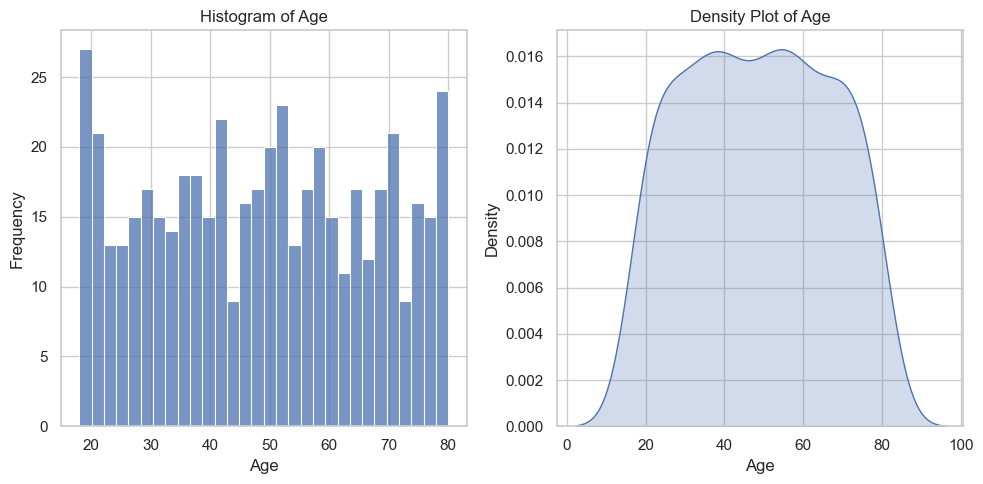

Statistics for Age:
count    500.000000
mean      48.494000
std       18.272321
min       18.000000
25%       33.000000
50%       48.500000
75%       64.000000
max       80.000000
Name: Age, dtype: float64

Skewness: 0.0142094210924208
Kurtosis: -1.1751384816820272


Column 'Gender' is not numeric and will be skipped.
Column 'Ethnicity' is not numeric and will be skipped.


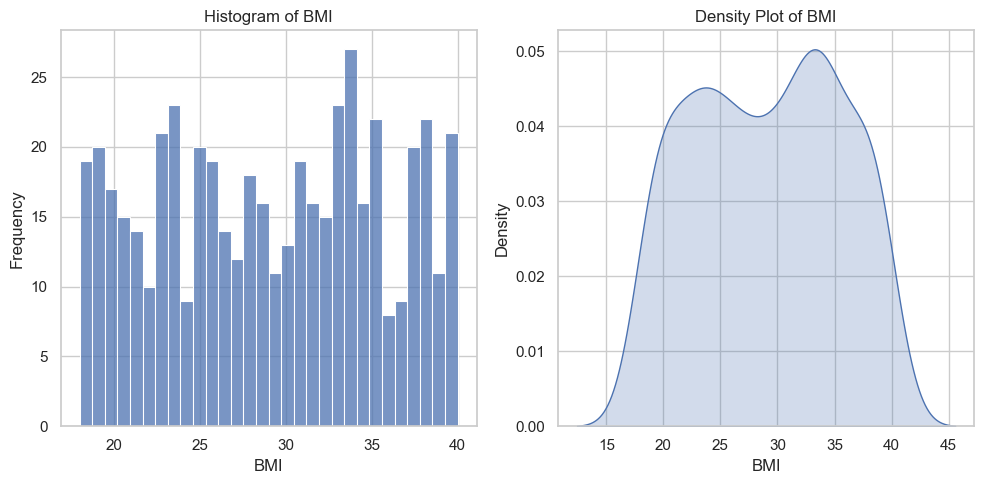

Statistics for BMI:
count    500.000000
mean      29.056200
std        6.428636
min       18.000000
25%       23.400000
50%       29.250000
75%       34.325000
max       40.000000
Name: BMI, dtype: float64

Skewness: -0.03344330681492657
Kurtosis: -1.215445272553514


Column 'PhysicalActivityLevel' is not numeric and will be skipped.
Column 'DietQuality' is not numeric and will be skipped.


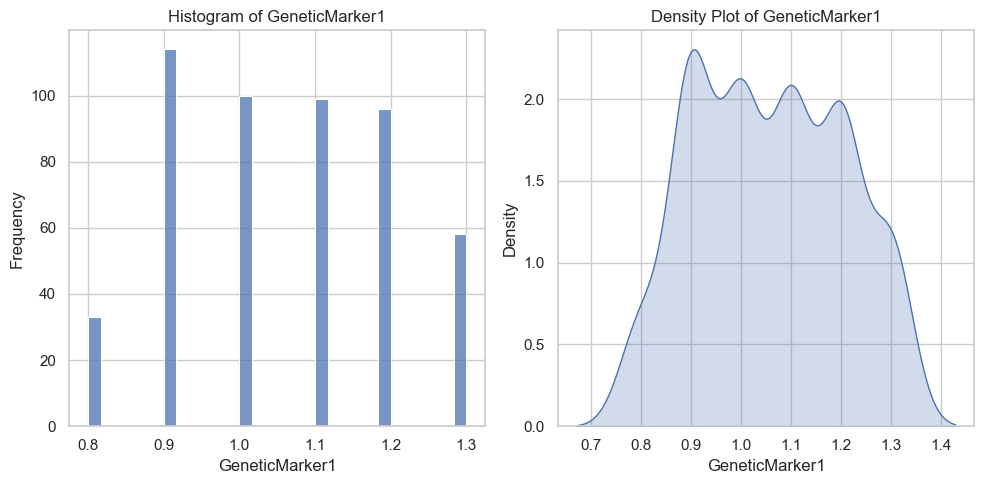

Statistics for GeneticMarker1:
count    500.000000
mean       1.057000
std        0.147698
min        0.800000
25%        0.900000
50%        1.100000
75%        1.200000
max        1.300000
Name: GeneticMarker1, dtype: float64

Skewness: 0.063061838755062
Kurtosis: -1.070348763784503




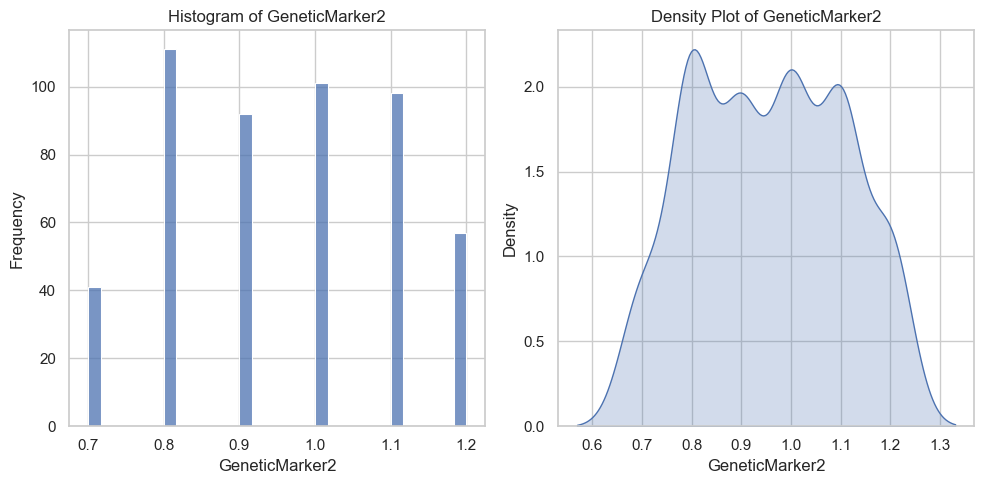

Statistics for GeneticMarker2:
count    500.000000
mean       0.955000
std        0.150467
min        0.700000
25%        0.800000
50%        1.000000
75%        1.100000
max        1.200000
Name: GeneticMarker2, dtype: float64

Skewness: 0.022281614587906763
Kurtosis: -1.089612111286953




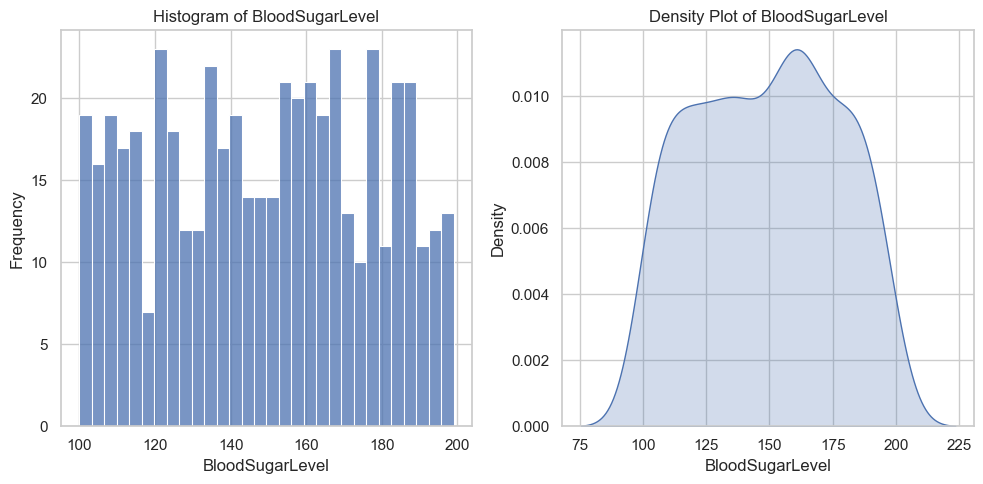

Statistics for BloodSugarLevel:
count    500.000000
mean     148.764000
std       28.162574
min      100.000000
25%      124.000000
50%      150.000000
75%      171.250000
max      199.000000
Name: BloodSugarLevel, dtype: float64

Skewness: -0.02449450234666534
Kurtosis: -1.1544096069519045


Column 'T2DMProgression' is not numeric and will be skipped.


In [57]:
# Function to plot distribution of each column
def plot_distributions(data):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            plt.figure(figsize=(10, 5))
            
            # Histogram
            plt.subplot(1, 2, 1)
            sns.histplot(data[column], kde=False, bins=30)
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            
            # Density plot (KDE)
            plt.subplot(1, 2, 2)
            sns.kdeplot(data[column], fill=True)
            plt.title(f'Density Plot of {column}')
            plt.xlabel(column)
            plt.ylabel('Density')
            
            plt.tight_layout()
            plt.show()
            
            # Display basic statistics
            print(f'Statistics for {column}:')
            print(data[column].describe())
            print('\nSkewness:', data[column].skew())
            print('Kurtosis:', data[column].kurtosis())
            print('\n')
        else:
            print(f"Column '{column}' is not numeric and will be skipped.")

# Plot distributions
plot_distributions(data)